# 3. Exploratory Data Analysis and Preprocessing

## 3.1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

from joblib import dump,load

In [2]:
# Aggregated data
df_final = pd.read_csv('./Data/final_not_cleaned.csv',index_col=0)

In [3]:
df_final.head()

,Player,G_sum,GS_sum,MP_sum,FG_sum,FGA_sum,3P_sum,3PA_sum,2P_sum,2PA_sum,...,foreign_birth,race_adjusted,award_count,all_team_awards,league_awards,years_coaching,lottery,hof,all_star_count,championships
0,A.C. Green,1361.0,905.0,39044.0,4778.0,9686.0,125.0,509.0,4653.0,9177.0,...,0,B,NaN,1.0,0.0,0,0.0,0,1.0,3
1,A.J. Wynder,6.0,0.0,39.0,3.0,12.0,0.0,1.0,3.0,11.0,...,0,B,NaN,NaN,NaN,0,NaN,0,NaN,0
2,Aaron James,356.0,0.0,7671.0,1609.0,3347.0,0.0,0.0,1609.0,3347.0,...,0,B,NaN,NaN,NaN,0,0.0,0,NaN,0
3,Aaron McKie,957.0,330.0,22594.0,2554.0,5923.0,441.0,1275.0,2113.0,4648.0,...,0,B,NaN,0.0,1.0,0,0.0,0,NaN,0
4,Aaron Miles,19.0,0.0,118.0,6.0,18.0,0.0,0.0,6.0,18.0,...,0,B,NaN,NaN,NaN,0,NaN,0,NaN,0


## 3.2. Final Cleaning - Filling Null Values

We have already discovered that many of df_final's statistical features will contain null values since there is an abundance of pre-modern players. These null values will be considered later. 

Our first task is to fill the null values in the features from section two. Many of the "null" values should simply be mapped to zeros. 

In [4]:
# Features with null values
df_final.columns[df_final.isna().any()].tolist()

['PER_mean',
 'TS%_mean',
 '3PAr_mean',
 'FTr_mean',
 'ORB%_mean',
 'DRB%_mean',
 'TRB%_mean',
 'AST%_mean',
 'STL%_mean',
 'BLK%_mean',
 'TOV%_mean',
 'USG%_mean',
 'WS/48_mean',
 'OBPM_mean',
 'DBPM_mean',
 'BPM_mean',
 'FG%_mean',
 '3P%_mean',
 '2P%_mean',
 'eFG%_mean',
 'FT%_mean',
 'OWS_sum',
 'DWS_sum',
 'WS_sum',
 'VORP_sum',
 'nameNick',
 'award_count',
 'all_team_awards',
 'league_awards',
 'lottery',
 'all_star_count']

In [5]:
# Sum of null values in each feature from section 2
df_final[['nameNick','award_count','all_team_awards','league_awards','lottery','all_star_count']].isnull().sum()

nameNick           1236
award_count        2866
all_team_awards    2617
league_awards      2617
lottery             627
all_star_count     2579
dtype: int64

#### 1. nameNick

We know that none of the values in the "Player" column are null. Thus, without loss of information, we can remove any other columns related to player identification. 

In [6]:
df_final = df_final.drop(['First','Last','bioID','useFirst','nameNick','firstName','lastName'],axis=1)

#### 2. award_count, all_team_awards, league_awards, and all_star_count

While we were engineering these features, we only assigned counts to players who have a count of at least one. Therefore, we can fill all null values in these columns with zeros.

In [7]:
df_final[['award_count','all_team_awards','league_awards','all_star_count']] = df_final[['award_count','all_team_awards','league_awards','all_star_count']].fillna(0)

#### 3. lottery

We have not yet assigned values to players who went undrafted or to players who were drafted under a different name. The vast majority of players with null draft values went undrafted, so we will map all of the null values to zero. Unfortunately, we have no easy way to track which players changed their name during their career. 

In [8]:
df_final['lottery'] = df_final['lottery'].map({1:1,0:0,np.nan:0})

In [9]:
df_final.head()

,Player,G_sum,GS_sum,MP_sum,FG_sum,FGA_sum,3P_sum,3PA_sum,2P_sum,2PA_sum,...,foreign_birth,race_adjusted,award_count,all_team_awards,league_awards,years_coaching,lottery,hof,all_star_count,championships
0,A.C. Green,1361.0,905.0,39044.0,4778.0,9686.0,125.0,509.0,4653.0,9177.0,...,0,B,0.0,1.0,0.0,0,0,0,1.0,3
1,A.J. Wynder,6.0,0.0,39.0,3.0,12.0,0.0,1.0,3.0,11.0,...,0,B,0.0,0.0,0.0,0,0,0,0.0,0
2,Aaron James,356.0,0.0,7671.0,1609.0,3347.0,0.0,0.0,1609.0,3347.0,...,0,B,0.0,0.0,0.0,0,0,0,0.0,0
3,Aaron McKie,957.0,330.0,22594.0,2554.0,5923.0,441.0,1275.0,2113.0,4648.0,...,0,B,0.0,0.0,1.0,0,0,0,0.0,0
4,Aaron Miles,19.0,0.0,118.0,6.0,18.0,0.0,0.0,6.0,18.0,...,0,B,0.0,0.0,0.0,0,0,0,0.0,0


In [10]:
# Only statistical null values remain
df_final.columns[df_final.isna().any()].tolist()

['PER_mean',
 'TS%_mean',
 '3PAr_mean',
 'FTr_mean',
 'ORB%_mean',
 'DRB%_mean',
 'TRB%_mean',
 'AST%_mean',
 'STL%_mean',
 'BLK%_mean',
 'TOV%_mean',
 'USG%_mean',
 'WS/48_mean',
 'OBPM_mean',
 'DBPM_mean',
 'BPM_mean',
 'FG%_mean',
 '3P%_mean',
 '2P%_mean',
 'eFG%_mean',
 'FT%_mean',
 'OWS_sum',
 'DWS_sum',
 'WS_sum',
 'VORP_sum']

## 3.3. Final Cleaning - Correct Column Types

In [11]:
df_final.dtypes

Player              object
G_sum              float64
GS_sum             float64
MP_sum             float64
FG_sum             float64
FGA_sum            float64
3P_sum             float64
3PA_sum            float64
2P_sum             float64
2PA_sum            float64
FT_sum             float64
FTA_sum            float64
ORB_sum            float64
DRB_sum            float64
TRB_sum            float64
AST_sum            float64
STL_sum            float64
BLK_sum            float64
TOV_sum            float64
PF_sum             float64
PTS_sum            float64
PER_mean           float64
TS%_mean           float64
3PAr_mean          float64
FTr_mean           float64
ORB%_mean          float64
DRB%_mean          float64
TRB%_mean          float64
AST%_mean          float64
STL%_mean          float64
BLK%_mean          float64
TOV%_mean          float64
USG%_mean          float64
WS/48_mean         float64
OBPM_mean          float64
DBPM_mean          float64
BPM_mean           float64
F

The columns that do not have correct data types are award_count, all_team_awards, league_awards, all_star_count, and the non-advanced columns that end with "sum". All of these columns are countable, so they should be represented as integers. 

In [12]:
df_final.iloc[:,1:21] = df_final.iloc[:,1:21].astype(int)
df_final[['award_count','all_team_awards','league_awards','all_star_count']] = df_final[['award_count','all_team_awards','league_awards','all_star_count']].astype(int)

In [13]:
# Correct data types
df_final.dtypes

Player              object
G_sum                int32
GS_sum               int32
MP_sum               int32
FG_sum               int32
FGA_sum              int32
3P_sum               int32
3PA_sum              int32
2P_sum               int32
2PA_sum              int32
FT_sum               int32
FTA_sum              int32
ORB_sum              int32
DRB_sum              int32
TRB_sum              int32
AST_sum              int32
STL_sum              int32
BLK_sum              int32
TOV_sum              int32
PF_sum               int32
PTS_sum              int32
PER_mean           float64
TS%_mean           float64
3PAr_mean          float64
FTr_mean           float64
ORB%_mean          float64
DRB%_mean          float64
TRB%_mean          float64
AST%_mean          float64
STL%_mean          float64
BLK%_mean          float64
TOV%_mean          float64
USG%_mean          float64
WS/48_mean         float64
OBPM_mean          float64
DBPM_mean          float64
BPM_mean           float64
F

## 3.4. Final Cleaning - Investigating and Removing Statistical Nulls

In [14]:
# Slice df_final to work with statistics exclusively
df_stats = df_final.iloc[:,1:46]

In [15]:
df_stats.columns

Index(['G_sum', 'GS_sum', 'MP_sum', 'FG_sum', 'FGA_sum', '3P_sum', '3PA_sum',
       '2P_sum', '2PA_sum', 'FT_sum', 'FTA_sum', 'ORB_sum', 'DRB_sum',
       'TRB_sum', 'AST_sum', 'STL_sum', 'BLK_sum', 'TOV_sum', 'PF_sum',
       'PTS_sum', 'PER_mean', 'TS%_mean', '3PAr_mean', 'FTr_mean', 'ORB%_mean',
       'DRB%_mean', 'TRB%_mean', 'AST%_mean', 'STL%_mean', 'BLK%_mean',
       'TOV%_mean', 'USG%_mean', 'WS/48_mean', 'OBPM_mean', 'DBPM_mean',
       'BPM_mean', 'FG%_mean', '3P%_mean', '2P%_mean', 'eFG%_mean', 'FT%_mean',
       'OWS_sum', 'DWS_sum', 'WS_sum', 'VORP_sum'],
      dtype='object')

In [16]:
df_stats.isnull().sum()

G_sum            0
GS_sum           0
MP_sum           0
FG_sum           0
FGA_sum          0
3P_sum           0
3PA_sum          0
2P_sum           0
2PA_sum          0
FT_sum           0
FTA_sum          0
ORB_sum          0
DRB_sum          0
TRB_sum          0
AST_sum          0
STL_sum          0
BLK_sum          0
TOV_sum          0
PF_sum           0
PTS_sum          0
PER_mean       147
TS%_mean        11
3PAr_mean     1011
FTr_mean        12
ORB%_mean      725
DRB%_mean      725
TRB%_mean      612
AST%_mean      488
STL%_mean      725
BLK%_mean      725
TOV%_mean      914
USG%_mean      908
WS/48_mean     147
OBPM_mean      723
DBPM_mean      723
BPM_mean       723
FG%_mean        12
3P%_mean      1308
2P%_mean        15
eFG%_mean       12
FT%_mean       121
OWS_sum          2
DWS_sum          2
WS_sum           2
VORP_sum       723
dtype: int64

### Imputation Exploration

One of the more feasible imputations would be developing a function that maps 2P% mean to 3P% mean. There could be a one-to-one correspondence between both of their density functions. 

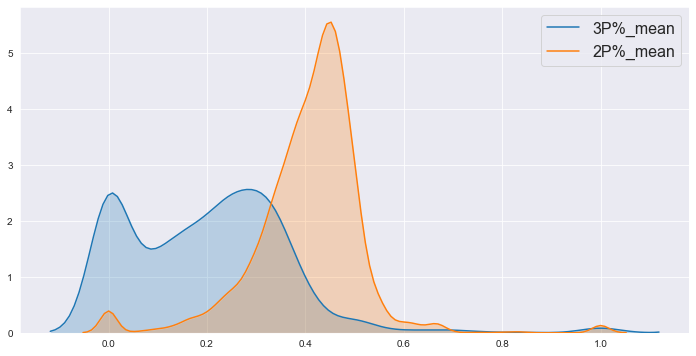

In [17]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.kdeplot(df_stats['3P%_mean'],shade=True)
sns.kdeplot(df_stats['2P%_mean'],shade=True)
plt.legend(prop={'size':16})

It appears that the correspondence is questionable since the distributions are different shapes. This problem can be alleviated with some KDE smoothing, but even that change would not guarantee success.

The main takeaway from this exploration is that it is difficult to impute unrecorded statistical values. Imputation would certainly not be any easier for advanced statistics. 

### Imputation Conclusion

While we would love to keep some of the advanced statistics, it is unrealistic to use features with hundreds of null values. It is almost impossible to impute these null values since they are based on distinct observations. We will remove all of the columns with more than 15 null values from df_stats.

In [18]:
df_stats.isnull().sum()[df_stats.isnull().sum()>15].index.tolist()

['PER_mean',
 '3PAr_mean',
 'ORB%_mean',
 'DRB%_mean',
 'TRB%_mean',
 'AST%_mean',
 'STL%_mean',
 'BLK%_mean',
 'TOV%_mean',
 'USG%_mean',
 'WS/48_mean',
 'OBPM_mean',
 'DBPM_mean',
 'BPM_mean',
 '3P%_mean',
 'FT%_mean',
 'VORP_sum']

In [19]:
df_stats = df_stats.drop(['PER_mean','3PAr_mean','ORB%_mean','DRB%_mean','TRB%_mean','AST%_mean','STL%_mean','BLK%_mean','TOV%_mean','USG%_mean','WS/48_mean','OBPM_mean','DBPM_mean','BPM_mean','3P%_mean','FT%_mean','VORP_sum'],axis=1)

In [20]:
df_stats.isnull().sum()[df_stats.isnull().sum()>0]

TS%_mean     11
FTr_mean     12
FG%_mean     12
2P%_mean     15
eFG%_mean    12
OWS_sum       2
DWS_sum       2
WS_sum        2
dtype: int64

In [21]:
len(df_stats[df_stats.isnull().any(axis=1)])/len(df_stats)

0.0058823529411764705

By removing the remaining rows with null values, we would lose less than .6% of the data. Let us go ahead and remove them. 

In [22]:
df_stats = df_stats.dropna()

In [23]:
# Empty series of columns with null values
df_stats.isnull().sum()[df_stats.isnull().sum()>0]

Series([], dtype: int64)

In [24]:
df_stats

,G_sum,GS_sum,MP_sum,FG_sum,FGA_sum,3P_sum,3PA_sum,2P_sum,2PA_sum,FT_sum,...,PF_sum,PTS_sum,TS%_mean,FTr_mean,FG%_mean,2P%_mean,eFG%_mean,OWS_sum,DWS_sum,WS_sum
0,1361,905,39044,4778,9686,125,509,4653,9177,3247,...,2581,12928,0.543556,0.437111,0.487667,0.501889,0.493167,60.7,43.5,104.2
1,6,0,39,3,12,0,1,3,11,6,...,1,12,0.387000,0.667000,0.250000,0.273000,0.250000,-0.1,0.0,0.0
2,356,0,7671,1609,3347,0,0,1609,3347,611,...,972,3829,0.517400,0.245200,0.479800,0.479800,0.479800,7.8,5.3,13.2
3,957,330,22594,2554,5923,441,1275,2113,4648,1087,...,1882,6636,0.493059,0.214471,0.423529,0.447647,0.457118,13.9,30.5,44.9
4,19,0,118,6,18,0,0,6,18,4,...,13,16,0.405000,0.222000,0.333000,0.333000,0.333000,-0.2,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,566,0,11451,1501,3665,0,0,1501,3665,720,...,1729,3722,0.452375,0.305250,0.410875,0.410875,0.410875,0.1,8.5,8.7
2886,954,0,23870,3588,8602,0,9,3588,8593,1410,...,2608,8586,0.450400,0.247267,0.416267,0.416867,0.416267,-3.8,37.5,33.8
2887,906,763,33245,6211,11951,325,1074,5886,10877,4960,...,2050,17707,0.609000,0.495538,0.518846,0.538769,0.532769,110.7,45.4,155.7
2888,353,122,6348,873,1980,29,121,844,1859,424,...,624,2199,0.472375,0.256125,0.424125,0.439125,0.429875,1.5,3.5,4.9


In [25]:
df_stats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
G_sum,2873.0,302.066829,335.545429,1.0000,36.000000,143.000000,515.000000,1644.000
GS_sum,2873.0,86.146537,198.252873,0.0000,0.000000,0.000000,49.000000,1471.000
MP_sum,2873.0,6885.764706,9768.002884,0.0000,195.000000,1762.000000,10616.000000,57446.000
FG_sum,2873.0,1143.229725,1821.751441,0.0000,36.000000,254.000000,1511.000000,15837.000
FGA_sum,2873.0,2522.664114,3863.064879,1.0000,96.000000,632.000000,3459.000000,28307.000
3P_sum,2873.0,63.610512,210.372643,0.0000,0.000000,0.000000,10.000000,2560.000
3PA_sum,2873.0,185.838496,580.042752,0.0000,0.000000,2.000000,46.000000,6486.000
2P_sum,2873.0,1079.619213,1744.336865,0.0000,34.000000,238.000000,1439.000000,15836.000
2PA_sum,2873.0,2336.825618,3628.268682,1.0000,89.000000,579.000000,3160.000000,28289.000
FT_sum,2873.0,610.593108,1041.984373,0.0000,19.000000,139.000000,766.000000,9787.000


Now we must explore if each sum column with zeros was measured in the pre-modern era. This case-by-case determination will largely dictate whether or not a statistic will be excluded from the model.

In [26]:
for col in df_stats.iloc[:,1:20].columns:
    print(col+': '+str(len(df_stats[col][df_stats[col]==0])))

GS_sum: 1602
MP_sum: 142
FG_sum: 45
FGA_sum: 0
3P_sum: 1639
3PA_sum: 1294
2P_sum: 48
2PA_sum: 0
FT_sum: 134
FTA_sum: 108
ORB_sum: 799
DRB_sum: 761
TRB_sum: 126
AST_sum: 103
STL_sum: 852
BLK_sum: 960
TOV_sum: 946
PF_sum: 30
PTS_sum: 26


It is relatively clear that all of the columns with over 750 zeros, aside from the GS_sum column, contain data for statistics that were not measured in the pre-modern era. We will have to remove those columns since they account for roughly 25% of the data or more. 

(GS_sum does not apply since many NBA players never start a game in their career.)

In [27]:
df_stats = df_stats.drop(['3P_sum','3PA_sum','ORB_sum','DRB_sum','STL_sum','BLK_sum','TOV_sum'],axis=1)

In [28]:
df_stats

,G_sum,GS_sum,MP_sum,FG_sum,FGA_sum,2P_sum,2PA_sum,FT_sum,FTA_sum,TRB_sum,...,PF_sum,PTS_sum,TS%_mean,FTr_mean,FG%_mean,2P%_mean,eFG%_mean,OWS_sum,DWS_sum,WS_sum
0,1361,905,39044,4778,9686,4653,9177,3247,4447,10129,...,2581,12928,0.543556,0.437111,0.487667,0.501889,0.493167,60.7,43.5,104.2
1,6,0,39,3,12,3,11,6,8,3,...,1,12,0.387000,0.667000,0.250000,0.273000,0.250000,-0.1,0.0,0.0
2,356,0,7671,1609,3347,1609,3347,611,804,1470,...,972,3829,0.517400,0.245200,0.479800,0.479800,0.479800,7.8,5.3,13.2
3,957,330,22594,2554,5923,2113,4648,1087,1389,3039,...,1882,6636,0.493059,0.214471,0.423529,0.447647,0.457118,13.9,30.5,44.9
4,19,0,118,6,18,6,18,4,4,14,...,13,16,0.405000,0.222000,0.333000,0.333000,0.333000,-0.2,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,566,0,11451,1501,3665,1501,3665,720,1043,1593,...,1729,3722,0.452375,0.305250,0.410875,0.410875,0.410875,0.1,8.5,8.7
2886,954,0,23870,3588,8602,3588,8593,1410,2162,7198,...,2608,8586,0.450400,0.247267,0.416267,0.416867,0.416267,-3.8,37.5,33.8
2887,906,763,33245,6211,11951,5886,10877,4960,5850,6559,...,2050,17707,0.609000,0.495538,0.518846,0.538769,0.532769,110.7,45.4,155.7
2888,353,122,6348,873,1980,844,1859,424,535,492,...,624,2199,0.472375,0.256125,0.424125,0.439125,0.429875,1.5,3.5,4.9


Now we must incorporate df_stats back into df_final. 

In [29]:
df_final = pd.concat([df_final.iloc[:,0],df_stats,df_final.iloc[:,46:]],axis=1)

In [30]:
df_final

,Player,G_sum,GS_sum,MP_sum,FG_sum,FGA_sum,2P_sum,2PA_sum,FT_sum,FTA_sum,...,foreign_birth,race_adjusted,award_count,all_team_awards,league_awards,years_coaching,lottery,hof,all_star_count,championships
0,A.C. Green,1361.0,905.0,39044.0,4778.0,9686.0,4653.0,9177.0,3247.0,4447.0,...,0,B,0,1,0,0,0,0,1,3
1,A.J. Wynder,6.0,0.0,39.0,3.0,12.0,3.0,11.0,6.0,8.0,...,0,B,0,0,0,0,0,0,0,0
2,Aaron James,356.0,0.0,7671.0,1609.0,3347.0,1609.0,3347.0,611.0,804.0,...,0,B,0,0,0,0,0,0,0,0
3,Aaron McKie,957.0,330.0,22594.0,2554.0,5923.0,2113.0,4648.0,1087.0,1389.0,...,0,B,0,0,1,0,0,0,0,0
4,Aaron Miles,19.0,0.0,118.0,6.0,18.0,6.0,18.0,4.0,4.0,...,0,B,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Em Bryant,566.0,0.0,11451.0,1501.0,3665.0,1501.0,3665.0,720.0,1043.0,...,0,B,0,0,0,0,0,0,0,0
2886,Gar Heard,954.0,0.0,23870.0,3588.0,8602.0,3588.0,8593.0,1410.0,2162.0,...,0,B,0,0,0,2,0,0,0,0
2887,Magic Johnson,906.0,763.0,33245.0,6211.0,11951.0,5886.0,10877.0,4960.0,5850.0,...,0,B,0,10,6,1,1,1,3,0
2888,Mike Holton,353.0,122.0,6348.0,873.0,1980.0,844.0,1859.0,424.0,535.0,...,0,B,0,0,0,0,0,0,0,0


## 3.5. Final Cleaning - Removing Outliers

We should pay attention to the fact that sum statistics generally follow an exponential-decay distribution, while mean statistics generally follow a normal distribution.

Hall-of-fame players are very likely to be outliers in the sum statistics, so we will keep those values. However, players with extremely little playing experience are very likely to be outliers in the mean statistics. These players are the outliers we want to remove. 

We will plot the distribution of each mean statistic to visualize the outliers before removal. 

In [31]:
df_final.columns

Index(['Player', 'G_sum', 'GS_sum', 'MP_sum', 'FG_sum', 'FGA_sum', '2P_sum',
       '2PA_sum', 'FT_sum', 'FTA_sum', 'TRB_sum', 'AST_sum', 'PF_sum',
       'PTS_sum', 'TS%_mean', 'FTr_mean', 'FG%_mean', '2P%_mean', 'eFG%_mean',
       'OWS_sum', 'DWS_sum', 'WS_sum', 'height', 'weight', 'nickname',
       'top_college', 'foreign_birth', 'race_adjusted', 'award_count',
       'all_team_awards', 'league_awards', 'years_coaching', 'lottery', 'hof',
       'all_star_count', 'championships'],
      dtype='object')

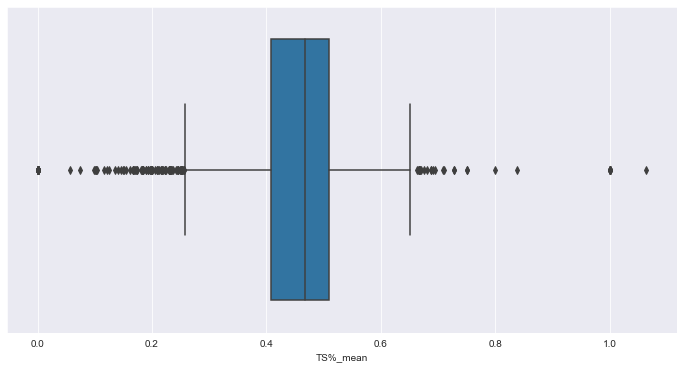

In [32]:
# TS%_mean
plt.figure(figsize=(12,6))
sns.boxplot(df_final['TS%_mean'])

In [33]:
len(df_final[df_final['TS%_mean']>.65]) # unrealistic career average

38

In [34]:
df_final = df_final[df_final['TS%_mean']<=.65]

In [35]:
len(df_final[df_final['TS%_mean']<.05]) # unrealistic career average

26

In [36]:
df_final = df_final[df_final['TS%_mean']>=.05]

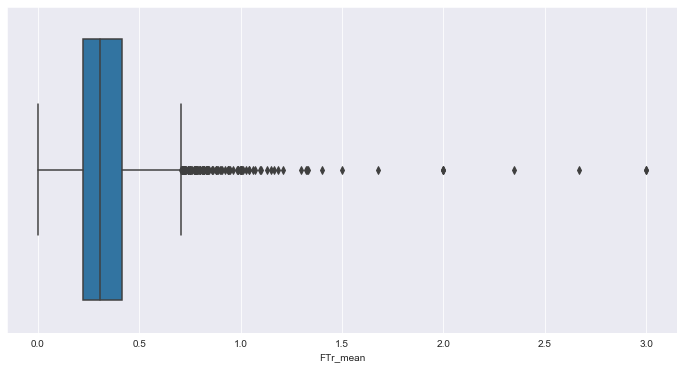

In [37]:
# FTr_mean
plt.figure(figsize=(12,6))
sns.boxplot(df_final['FTr_mean'])

In [38]:
len(df_final[df_final['FTr_mean']>1]) # unrealistic career average

27

In [39]:
df_final = df_final[df_final['FTr_mean']<=1]

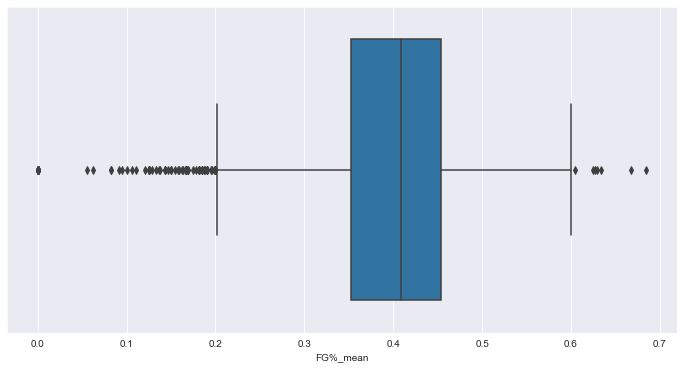

In [40]:
# FG%_mean
plt.figure(figsize=(12,6))
sns.boxplot(df_final['FG%_mean'])

In [41]:
len(df_final[df_final['FG%_mean']<.05]) # unrealistic career average

15

In [42]:
df_final = df_final[df_final['FG%_mean']>=.05]

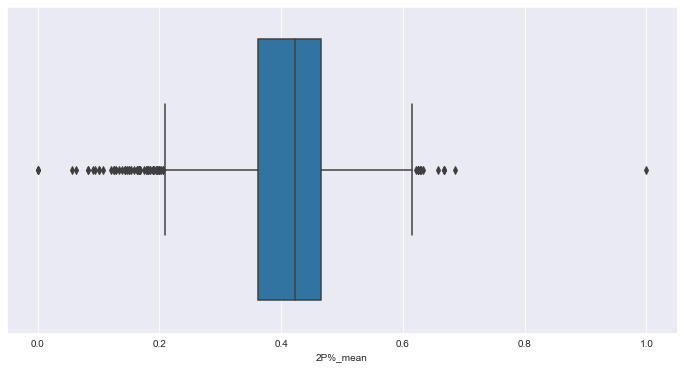

In [43]:
# 2P%_mean
plt.figure(figsize=(12,6))
sns.boxplot(df_final['2P%_mean'])

In [44]:
len(df_final[df_final['2P%_mean']>.8]) # unrealistic career average

1

In [45]:
df_final = df_final[df_final['2P%_mean']<=.8]

In [46]:
len(df_final[df_final['2P%_mean']<.05]) # unrealistic career average

3

In [47]:
df_final = df_final[df_final['2P%_mean']>=.05]

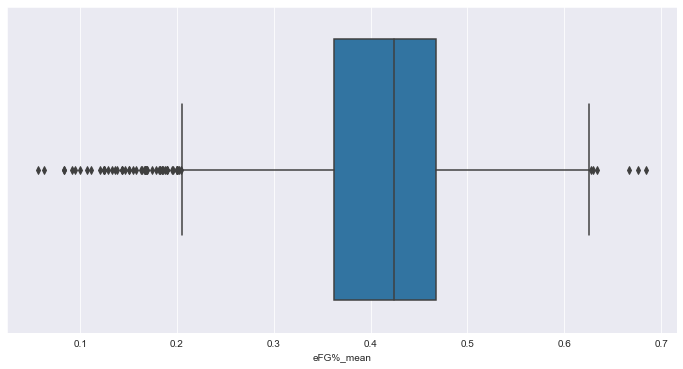

In [48]:
# eFG%_mean
plt.figure(figsize=(12,6))
sns.boxplot(df_final['eFG%_mean'])

All of the major outliers have already been filtered out since eFG% mean is highly correlated with other mean statistics. 

In [49]:
df_final

,Player,G_sum,GS_sum,MP_sum,FG_sum,FGA_sum,2P_sum,2PA_sum,FT_sum,FTA_sum,...,foreign_birth,race_adjusted,award_count,all_team_awards,league_awards,years_coaching,lottery,hof,all_star_count,championships
0,A.C. Green,1361.0,905.0,39044.0,4778.0,9686.0,4653.0,9177.0,3247.0,4447.0,...,0,B,0,1,0,0,0,0,1,3
1,A.J. Wynder,6.0,0.0,39.0,3.0,12.0,3.0,11.0,6.0,8.0,...,0,B,0,0,0,0,0,0,0,0
2,Aaron James,356.0,0.0,7671.0,1609.0,3347.0,1609.0,3347.0,611.0,804.0,...,0,B,0,0,0,0,0,0,0,0
3,Aaron McKie,957.0,330.0,22594.0,2554.0,5923.0,2113.0,4648.0,1087.0,1389.0,...,0,B,0,0,1,0,0,0,0,0
4,Aaron Miles,19.0,0.0,118.0,6.0,18.0,6.0,18.0,4.0,4.0,...,0,B,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Em Bryant,566.0,0.0,11451.0,1501.0,3665.0,1501.0,3665.0,720.0,1043.0,...,0,B,0,0,0,0,0,0,0,0
2886,Gar Heard,954.0,0.0,23870.0,3588.0,8602.0,3588.0,8593.0,1410.0,2162.0,...,0,B,0,0,0,2,0,0,0,0
2887,Magic Johnson,906.0,763.0,33245.0,6211.0,11951.0,5886.0,10877.0,4960.0,5850.0,...,0,B,0,10,6,1,1,1,3,0
2888,Mike Holton,353.0,122.0,6348.0,873.0,1980.0,844.0,1859.0,424.0,535.0,...,0,B,0,0,0,0,0,0,0,0


## 3.6. Generating Dummy Variables

Before we do any correlational analysis, we must make sure that all of our columns are of a numerical type. The only column we need to change is race_adjusted. We can perform this operation by using dummy variables for each of the three race options. 

In [50]:
# Three race options
df_final['race_adjusted'].value_counts()

B    1678
W    1080
O       5
Name: race_adjusted, dtype: int64

In [51]:
dummies = pd.get_dummies(df_final['race_adjusted'],drop_first=True)
df_final = df_final.drop(['race_adjusted'],axis=1)
df_final = pd.concat([df_final,dummies],axis=1)

In [52]:
df_final

,Player,G_sum,GS_sum,MP_sum,FG_sum,FGA_sum,2P_sum,2PA_sum,FT_sum,FTA_sum,...,award_count,all_team_awards,league_awards,years_coaching,lottery,hof,all_star_count,championships,O,W
0,A.C. Green,1361.0,905.0,39044.0,4778.0,9686.0,4653.0,9177.0,3247.0,4447.0,...,0,1,0,0,0,0,1,3,0,0
1,A.J. Wynder,6.0,0.0,39.0,3.0,12.0,3.0,11.0,6.0,8.0,...,0,0,0,0,0,0,0,0,0,0
2,Aaron James,356.0,0.0,7671.0,1609.0,3347.0,1609.0,3347.0,611.0,804.0,...,0,0,0,0,0,0,0,0,0,0
3,Aaron McKie,957.0,330.0,22594.0,2554.0,5923.0,2113.0,4648.0,1087.0,1389.0,...,0,0,1,0,0,0,0,0,0,0
4,Aaron Miles,19.0,0.0,118.0,6.0,18.0,6.0,18.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Em Bryant,566.0,0.0,11451.0,1501.0,3665.0,1501.0,3665.0,720.0,1043.0,...,0,0,0,0,0,0,0,0,0,0
2886,Gar Heard,954.0,0.0,23870.0,3588.0,8602.0,3588.0,8593.0,1410.0,2162.0,...,0,0,0,2,0,0,0,0,0,0
2887,Magic Johnson,906.0,763.0,33245.0,6211.0,11951.0,5886.0,10877.0,4960.0,5850.0,...,0,10,6,1,1,1,3,0,0,0
2888,Mike Holton,353.0,122.0,6348.0,873.0,1980.0,844.0,1859.0,424.0,535.0,...,0,0,0,0,0,0,0,0,0,0


## 3.7. Detecting Multicollinearity

In [53]:
# Number of feature pairs that are highly correlated
int((df_final.corr()>.95).sum().sum()/2)

40

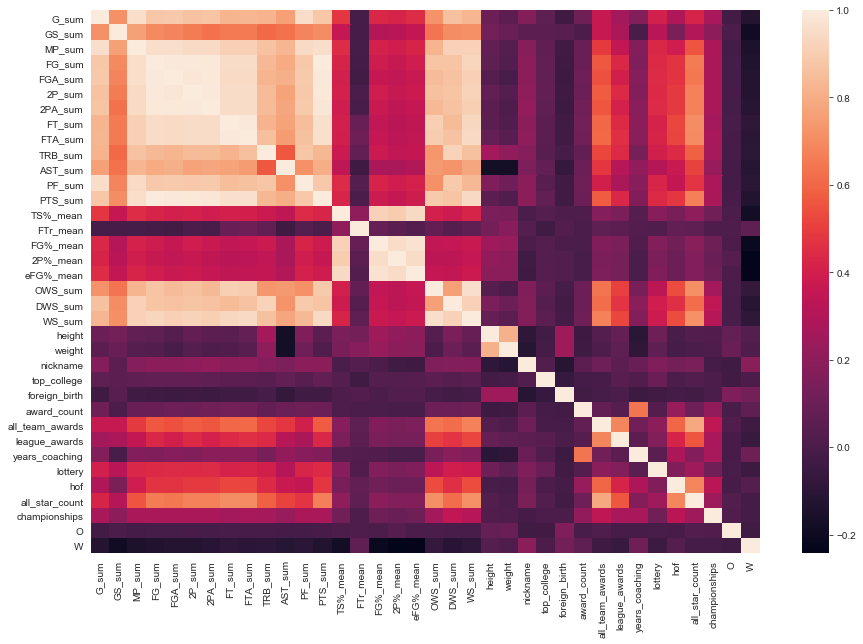

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(df_final.corr())

Clearly, we have a high degree of multicollinearity in our data, particularly between the statistical features. This situation should come as no surpise, though, since the best basketball players usually excel in multiple areas. Furthermore, some of the statistics we have included measure very similar facets of the game. 

In an effort to reduce obvious redudancy of statistics, we will first remove the statistics that measure shot attempts. These statistics are effectively identical to the statistics that measure shots made. 

Afterward, we will correct for the remaining multicollinearity by using principal component analysis (PCA). Evaluating basketball players has historically relied on the "eye test," meaning that hall-of-fame criteria likely go beyond the cut-and-dry statistics. PCA will allow us to generate synthesized features without having to drop any existing features. 

Ultimately, we hope that PCA helps preserve any covariance between features. This preservation would allow our model to emulate the "eye test." The number of principal components we will include will be decided later. 

In [55]:
# Removing "attempt" statistics
df_final = df_final.drop(['FGA_sum','2PA_sum','FTA_sum'],axis=1)

## 3.8. Saving Cleaned Data Frame

In [56]:
df_final = df_final.reset_index(drop=True)

In [57]:
df_final

,Player,G_sum,GS_sum,MP_sum,FG_sum,2P_sum,FT_sum,TRB_sum,AST_sum,PF_sum,...,award_count,all_team_awards,league_awards,years_coaching,lottery,hof,all_star_count,championships,O,W
0,A.C. Green,1361.0,905.0,39044.0,4778.0,4653.0,3247.0,10129.0,1469.0,2581.0,...,0,1,0,0,0,0,1,3,0,0
1,A.J. Wynder,6.0,0.0,39.0,3.0,3.0,6.0,3.0,8.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,Aaron James,356.0,0.0,7671.0,1609.0,1609.0,611.0,1470.0,370.0,972.0,...,0,0,0,0,0,0,0,0,0,0
3,Aaron McKie,957.0,330.0,22594.0,2554.0,2113.0,1087.0,3039.0,2462.0,1882.0,...,0,0,1,0,0,0,0,0,0,0
4,Aaron Miles,19.0,0.0,118.0,6.0,6.0,4.0,14.0,24.0,13.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,Em Bryant,566.0,0.0,11451.0,1501.0,1501.0,720.0,1593.0,1700.0,1729.0,...,0,0,0,0,0,0,0,0,0,0
2759,Gar Heard,954.0,0.0,23870.0,3588.0,3588.0,1410.0,7198.0,1470.0,2608.0,...,0,0,0,2,0,0,0,0,0,0
2760,Magic Johnson,906.0,763.0,33245.0,6211.0,5886.0,4960.0,6559.0,10141.0,2050.0,...,0,10,6,1,1,1,3,0,0,0
2761,Mike Holton,353.0,122.0,6348.0,873.0,844.0,424.0,492.0,1032.0,624.0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df_final.to_csv('./Data/final_cleaned.csv')

## 3.9. Preprocessing - Scaling Determination

In [59]:
df_final_scaled = df_final.drop(['Player'],axis=1)

In [60]:
df_final_scaled.head()

,G_sum,GS_sum,MP_sum,FG_sum,2P_sum,FT_sum,TRB_sum,AST_sum,PF_sum,PTS_sum,...,award_count,all_team_awards,league_awards,years_coaching,lottery,hof,all_star_count,championships,O,W
0,1361.0,905.0,39044.0,4778.0,4653.0,3247.0,10129.0,1469.0,2581.0,12928.0,...,0,1,0,0,0,0,1,3,0,0
1,6.0,0.0,39.0,3.0,3.0,6.0,3.0,8.0,1.0,12.0,...,0,0,0,0,0,0,0,0,0,0
2,356.0,0.0,7671.0,1609.0,1609.0,611.0,1470.0,370.0,972.0,3829.0,...,0,0,0,0,0,0,0,0,0,0
3,957.0,330.0,22594.0,2554.0,2113.0,1087.0,3039.0,2462.0,1882.0,6636.0,...,0,0,1,0,0,0,0,0,0,0
4,19.0,0.0,118.0,6.0,6.0,4.0,14.0,24.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


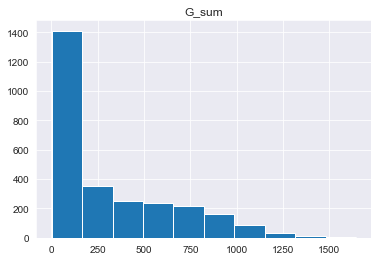

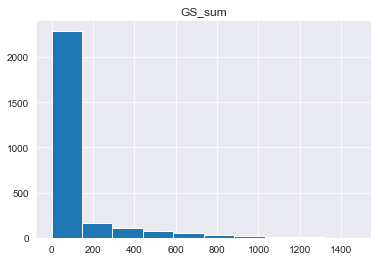

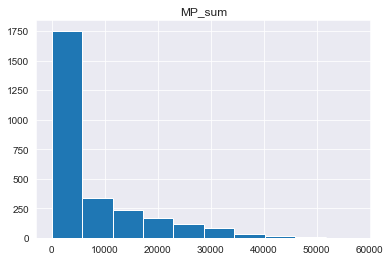

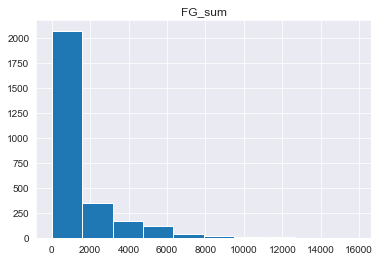

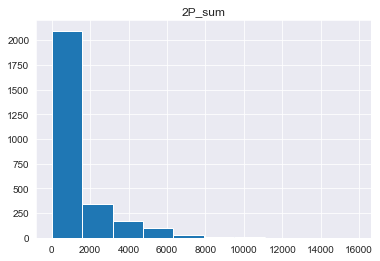

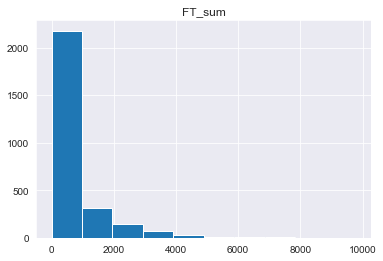

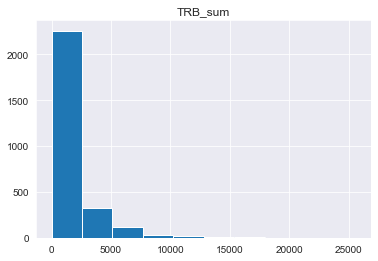

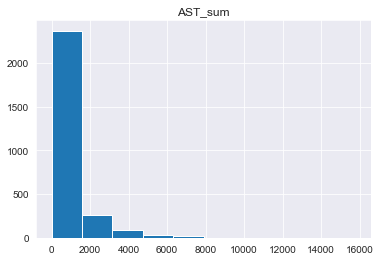

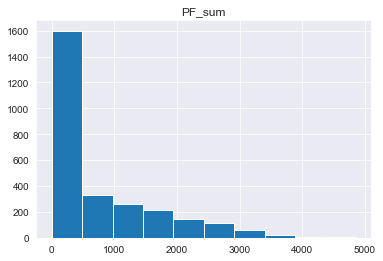

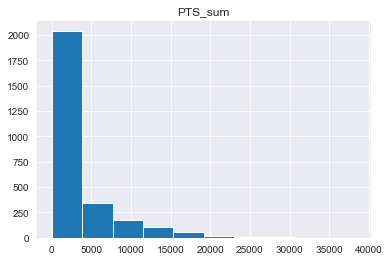

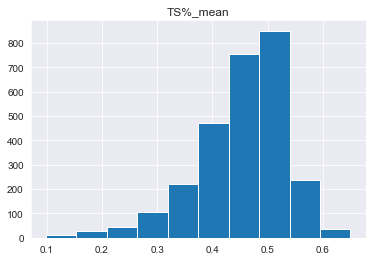

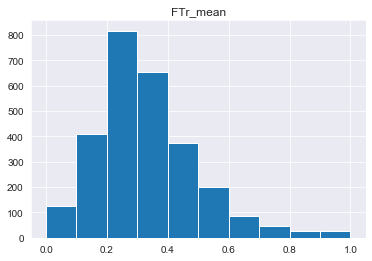

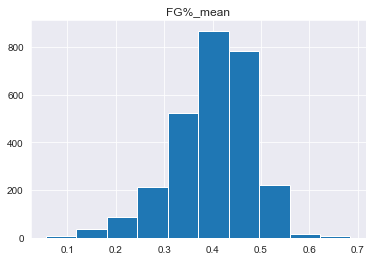

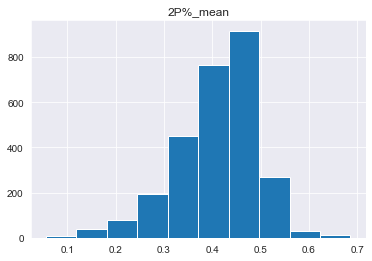

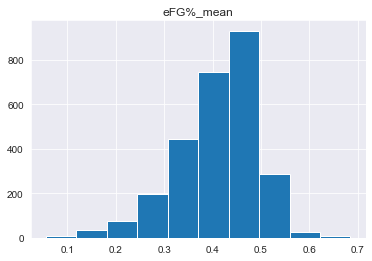

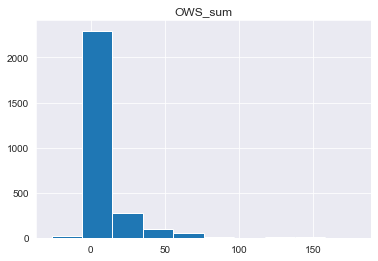

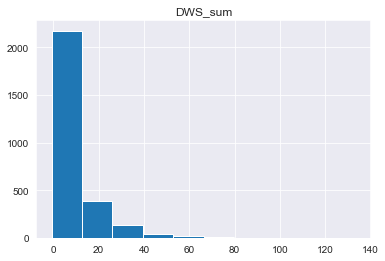

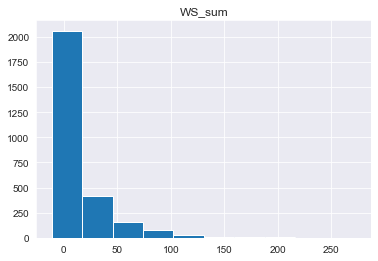

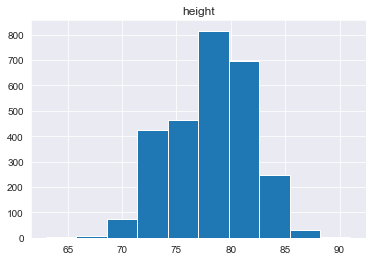

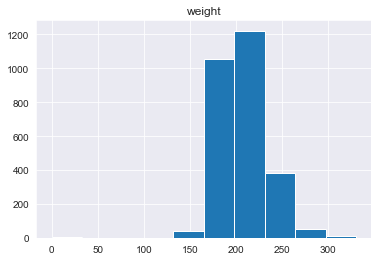

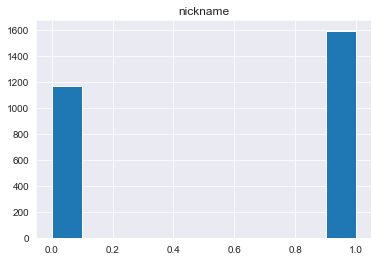

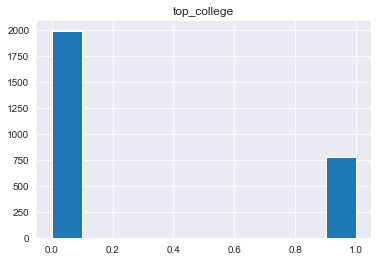

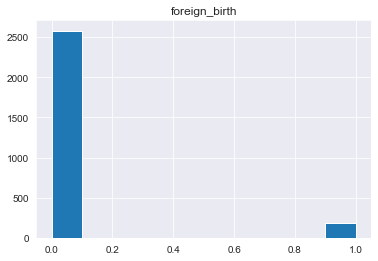

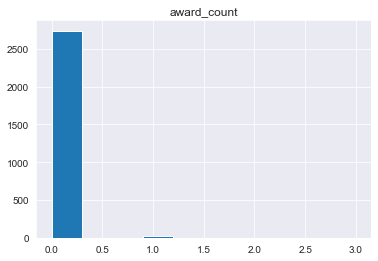

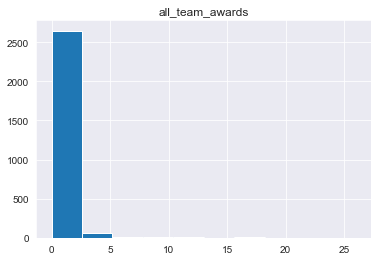

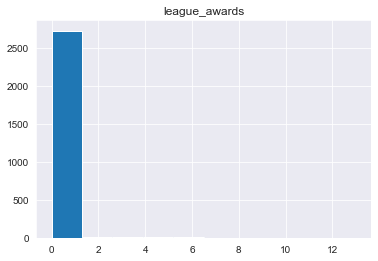

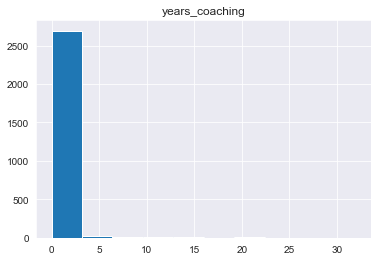

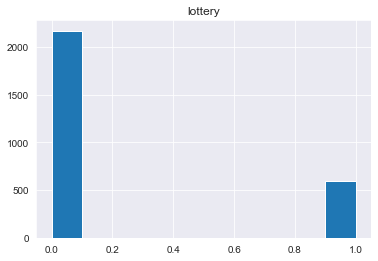

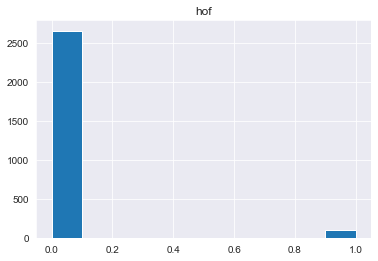

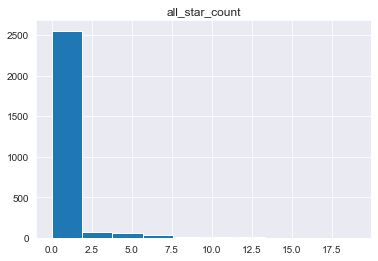

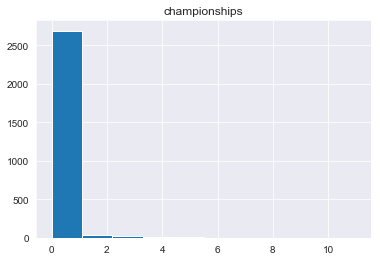

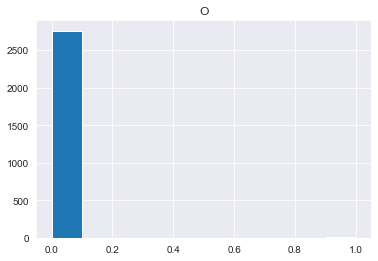

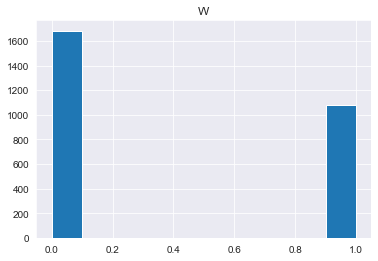

In [61]:
for col in df_final_scaled.columns:
    plt.figure()
    df_final_scaled[col].hist()
    plt.title(col)

We notice that there are five types of features remaining: 
1. Sum statistics, which are continuous and exponentially distributed
2. Mean statistics, which are continuous and normally distributed
3. Measurement statistics, which are continuous and normally distributed
4. Categorical indicators, which are discrete
5. Counter statistics, which are continuous and exponentially distributed

We will need to perform scaling on the four types of features that are continuous. Our end goal is to obtain data that resembles the Gaussian (bell-shaped) distribution. We can accomplish this by using PowerTransformer on the exponentially distributed type and StandardScaler on the normally distributed types. 

In [62]:
df_final_scaled.columns

Index(['G_sum', 'GS_sum', 'MP_sum', 'FG_sum', '2P_sum', 'FT_sum', 'TRB_sum',
       'AST_sum', 'PF_sum', 'PTS_sum', 'TS%_mean', 'FTr_mean', 'FG%_mean',
       '2P%_mean', 'eFG%_mean', 'OWS_sum', 'DWS_sum', 'WS_sum', 'height',
       'weight', 'nickname', 'top_college', 'foreign_birth', 'award_count',
       'all_team_awards', 'league_awards', 'years_coaching', 'lottery', 'hof',
       'all_star_count', 'championships', 'O', 'W'],
      dtype='object')

Here are the features placed into their respective types:
1. G_sum, GS_sum, MP_sum, FG_sum, 2P_sum, FT_sum, TRB_sum, AST_sum, PF_sum, PTS_sum, OWS_sum, DWS_sum, WS_sum
2. TS% mean, FTr_mean, FG% mean, 2P% mean, eFG% mean
3. height, weight
4. nickname, top_college, foreign_birth, lottery, hof (target), O, W
5. award_count, all_team_awards, league_awards, years_coaching, all_star_count, championships

## 3.10. Stratified Train-Test Split and Scaling

Ideally, we would like to use stratified k-fold cross-validation. However, due to the complexity of our scaling and PCA processes, using stratified train-test split is a practical alternative. 

In [63]:
X = df_final_scaled.drop(['hof'],axis=1)
y = df_final_scaled['hof']

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [65]:
# Indices to be used for pairing predictions with player data
test_indices = X_test.index

In [66]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Now that the data is split, we can scale the features according to their types listed above. 

### Type 1: 

In [67]:
cols1 = ['G_sum','GS_sum','MP_sum','FG_sum','2P_sum','FT_sum','TRB_sum','AST_sum','PF_sum','PTS_sum','OWS_sum','DWS_sum','WS_sum']

In [68]:
pt1 = PowerTransformer()
pt1.fit(X_train[cols1])
X_train[cols1] = pt1.transform(X_train[cols1])
X_test[cols1] = pt1.transform(X_test[cols1])

### Type 2:

In [69]:
cols2 = ['TS%_mean','FTr_mean','FG%_mean','2P%_mean','eFG%_mean']

In [70]:
ss1 = StandardScaler()
X_train[cols2] = ss1.fit_transform(X_train[cols2])
X_test[cols2] = ss1.transform(X_test[cols2])

### Type 3:

In [71]:
cols3 = ['height','weight']

In [72]:
ss2 = StandardScaler()
X_train[cols3] = ss2.fit_transform(X_train[cols3])
X_test[cols3] = ss2.transform(X_test[cols3])

### Type 4:

No scaling needed.

### Type 5:

In [73]:
cols5 = ['award_count','all_team_awards','league_awards','years_coaching','all_star_count','championships']

In [74]:
pt2 = PowerTransformer()
pt2.fit(X_train[cols5])
X_train[cols5] = pt2.transform(X_train[cols5])
X_test[cols5] = pt2.transform(X_test[cols5])

We should now have Gaussian distributions for every continuous feature. Here are the histograms: 

C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


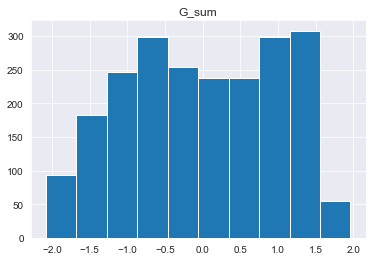

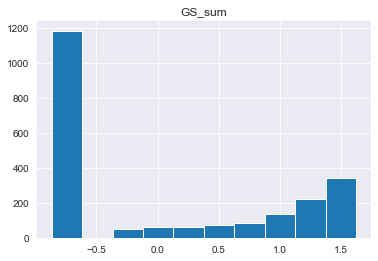

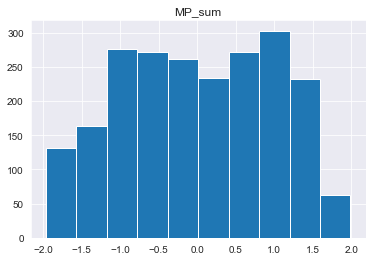

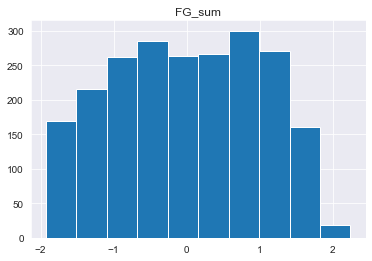

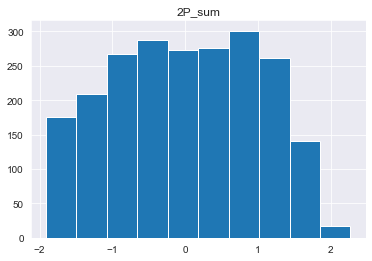

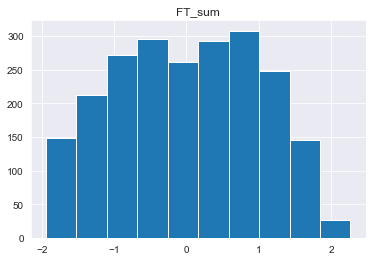

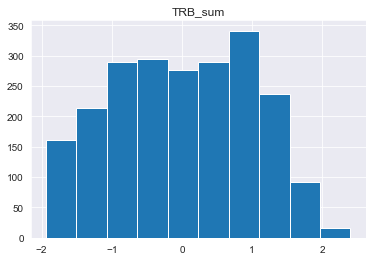

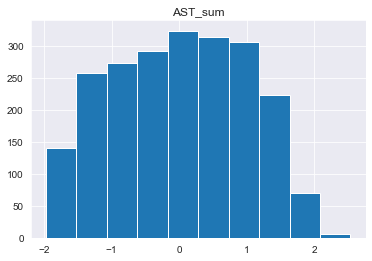

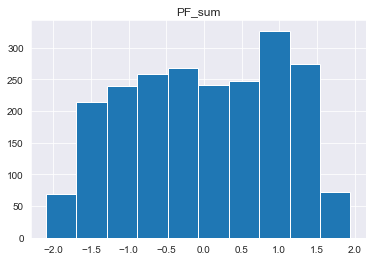

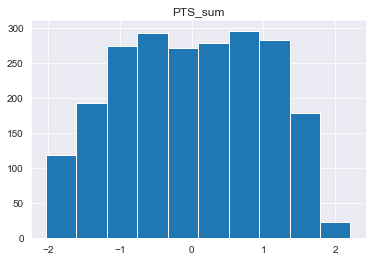

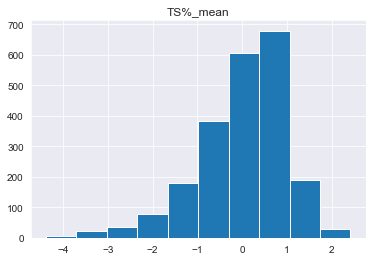

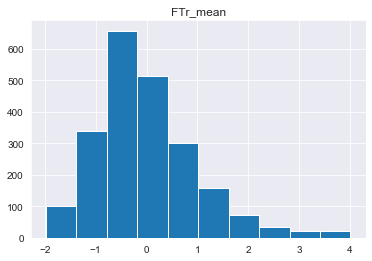

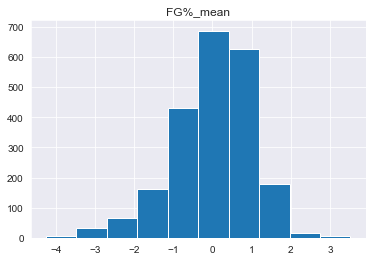

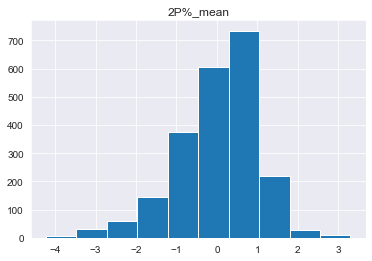

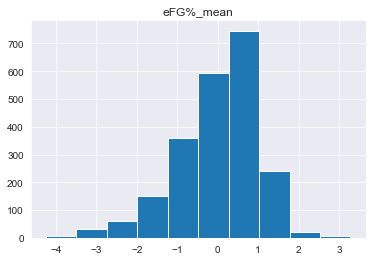

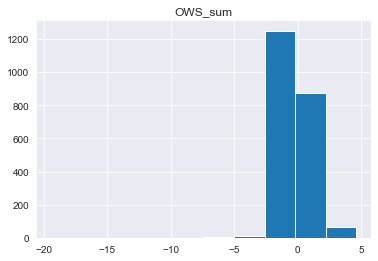

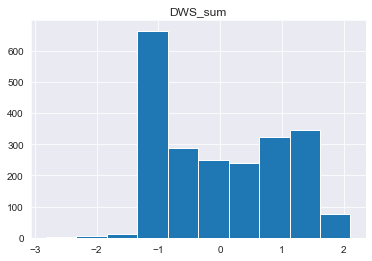

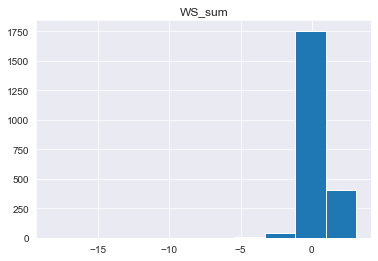

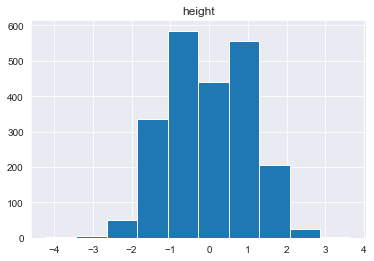

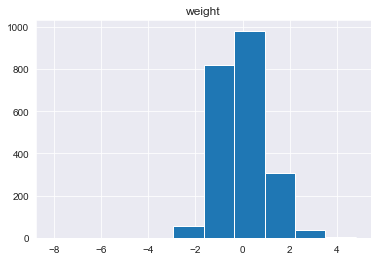

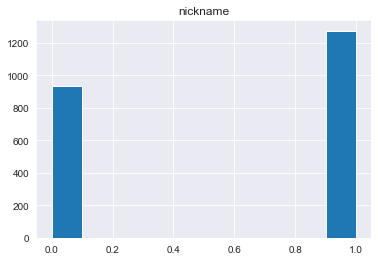

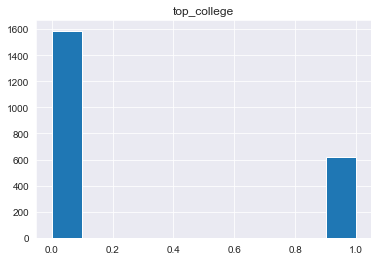

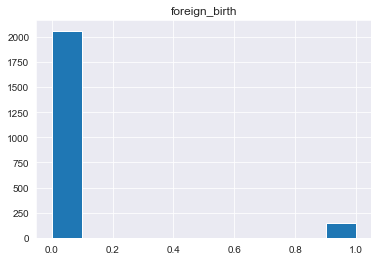

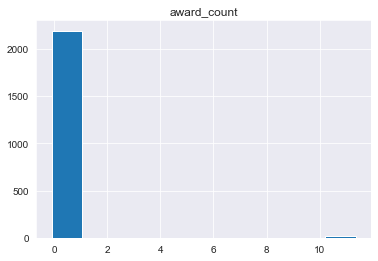

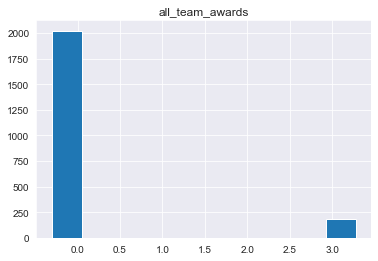

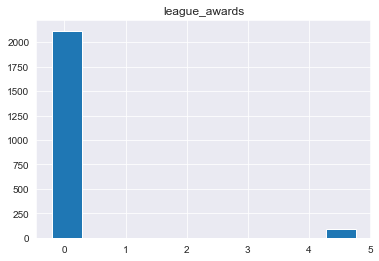

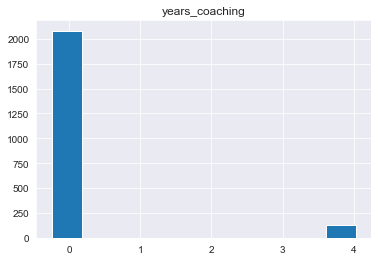

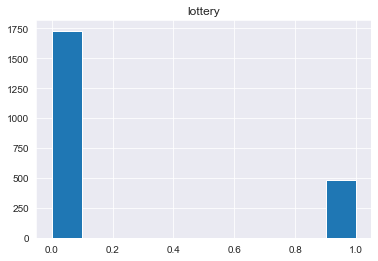

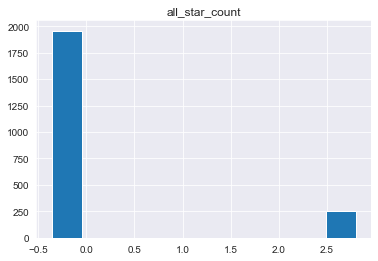

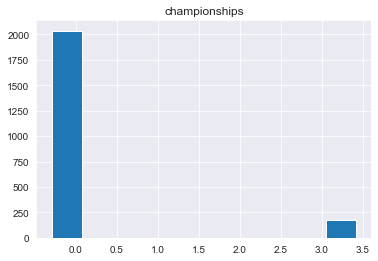

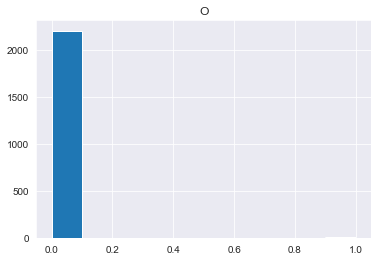

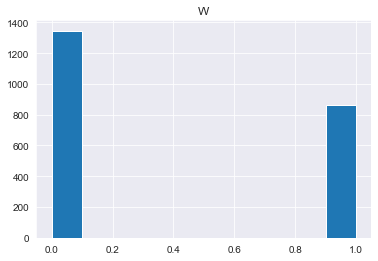

In [75]:
for col in X_train.columns:
    plt.figure()
    X_train[col].hist()
    plt.title(col)

The only distribution that is questionable is GS_sum. However, we cannot do much to fix the problem since most NBA players have started zero games in their careers. 

## 3.11. Overcoming Multicollinearity - Principal Component Analysis

In [76]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [77]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [78]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2.975946,-0.913454,2.158092,1.147607,1.023331,2.230390,2.358690,0.027932,-0.673598,0.057909,...,-0.060747,0.024895,-0.138010,-0.068614,-0.142289,0.074087,0.077980,-0.013978,0.008142,-0.001919
1,-3.717841,-0.062677,0.727573,0.910467,-0.099535,0.423357,-0.394982,-0.035620,-0.206153,0.094677,...,-0.146092,-0.050752,0.164357,0.056316,-0.104061,-0.048703,-0.031062,-0.008941,-0.004340,0.000257
2,4.887636,0.976840,0.338395,-2.278778,-0.393715,-0.517292,0.431753,-1.359655,0.897674,-0.464494,...,-0.064931,0.134138,-0.005302,-0.144440,0.089816,-0.148860,-0.012945,0.005612,-0.013455,-0.000286
3,1.865821,0.303514,0.416573,-1.646780,-0.221572,0.054911,-0.049149,-0.183509,0.567708,-0.109047,...,-0.295231,-0.210657,-0.180210,0.120235,0.104632,-0.126936,-0.213308,0.002769,-0.006680,-0.000538
4,-3.730708,-2.970469,-3.334038,-0.526263,0.095080,-0.924778,0.265335,0.141686,-0.041687,0.050080,...,-0.265321,0.170904,0.176004,0.063035,-0.469622,-0.037751,0.099468,-0.000119,0.010194,-0.025601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,0.015401,1.679931,3.080025,-0.745757,0.670242,0.030794,-0.704120,3.090022,-0.616937,1.043344,...,0.008489,-0.987535,0.133429,0.137429,0.028919,-0.122944,-0.083641,-0.000417,-0.012017,0.004488
2206,-3.123640,1.272742,-0.519042,-1.009270,-0.407303,0.394070,-0.200101,-0.068665,-0.118601,0.075297,...,0.049855,-0.007589,0.014842,0.087259,-0.126794,-0.088021,0.032527,0.006070,-0.005801,0.000099
2207,5.509334,-1.495015,1.073812,-0.481367,0.045330,-0.299993,-0.137400,-1.295852,0.323210,-0.438094,...,0.053625,0.233062,-0.177236,0.068735,-0.073163,0.083733,-0.054105,0.005441,-0.001446,0.002492
2208,-2.586798,-0.050000,-1.069556,-1.054740,-0.314269,0.069971,0.144655,-0.054897,0.317777,0.056076,...,0.023208,-0.023589,0.225403,0.163473,0.356267,-0.173636,-0.088584,-0.000020,-0.017886,-0.009332


## 3.12. Selecting Number of Principal Components

First, let us get an idea of how well our principal components are distinguishing players based on the "hof" feature.

Text(0.5, 1.0, 'First Principal Component vs. Second Principal Component')

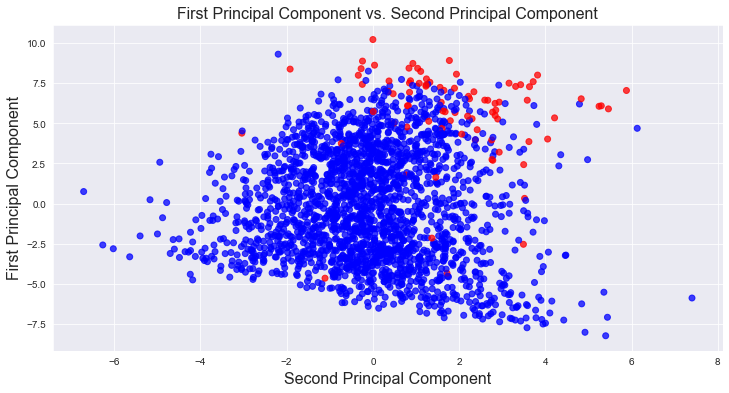

In [79]:
# Two-dimensional example
plt.figure(figsize=(12,6))

plt.scatter(X_train[1],X_train[0],c=y_train,cmap='bwr',alpha=.75)

plt.ylabel('First Principal Component',fontsize=16)
plt.xlabel('Second Principal Component',fontsize=16)
plt.title('First Principal Component vs. Second Principal Component',fontsize=16)

We can also look at which features are accounted for the most in each principal component. 

In [80]:
df_composition = pd.DataFrame(pca.components_,columns=X.columns)

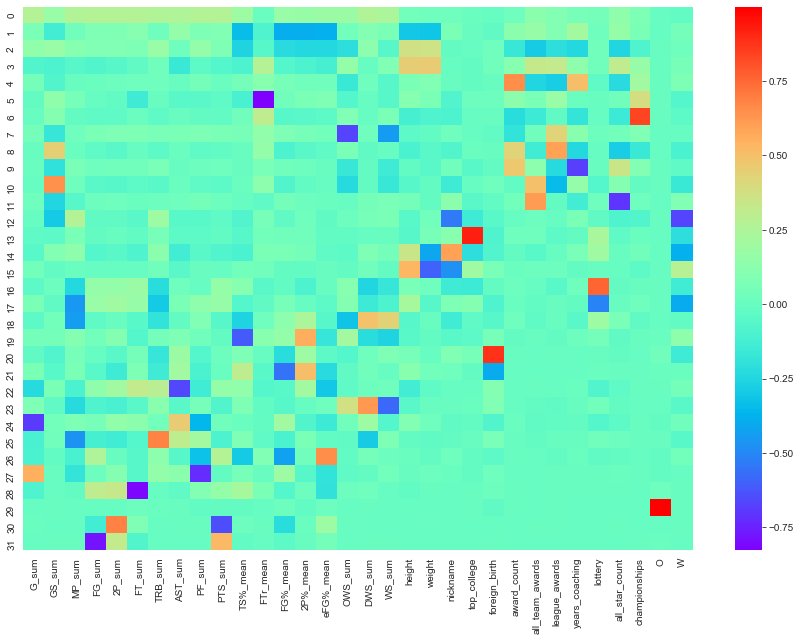

In [81]:
plt.figure(figsize=(15,10))
sns.heatmap(df_composition,cmap='rainbow')

We observe that the principal components at the top are fairly homogeneously constituted. However, it does appear that mean statistics could be the most important feature type. 

Now, we should investigate how much of the data's variance is explained by each principal component. This information will be easiest to understand when it is in cumulative form. 

In [82]:
# Cumulative explained variance by the first n principal components
exp_var = pd.DataFrame({'Cumulative Explained Variance':pca.explained_variance_ratio_.cumsum()},index=range(1,33))

In [83]:
exp_var

,Cumulative Explained Variance
1,0.482765
2,0.591454
3,0.656537
4,0.720124
5,0.765911
6,0.803222
7,0.835739
8,0.864285
9,0.888577
10,0.911307


Text(0.5, 1.0, 'Cumulative Explained Variance')

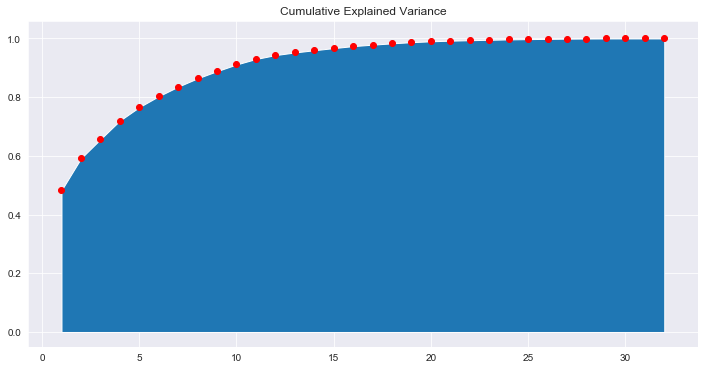

In [84]:
plt.figure(figsize=(12,6))

plt.fill_between(x=range(1,33),y1=exp_var['Cumulative Explained Variance'],y2=0)
plt.scatter(range(1,33),exp_var,c='red')

plt.title('Cumulative Explained Variance')

After the 12th principal component, the cumulative explained variance increases by less than 1% with each new principal component. We will keep this fact in mind when selecting the number of components to keep. 

These two factors are the ones we will use to evaluate whether or not a principal component should be included:
1. Correlation with "hof" feature
2. SelectKBest p-value and SelectKBest ANOVA F-score

In [85]:
# Correlation with "hof" feature
corr = []

for col in X_train.columns:
    corr.append(X_train[col].corr(y_train))
    
df_corr = pd.DataFrame({'Correlation Coefficients':corr},index=range(1,33))

In [86]:
df_corr

,Correlation Coefficients
1,0.315623
2,0.221345
3,-0.293613
4,0.359019
5,-0.024662
6,0.068368
7,-0.040325
8,0.038043
9,-0.010646
10,0.035709


We note that only the first four principal components have a sizeable correlation with the "hof" feature. 

In [87]:
selector = SelectKBest(k='all');
selector.fit_transform(X_train,y_train)

array([[ 2.97594621e+00, -9.13453761e-01,  2.15809191e+00, ...,
        -1.39784847e-02,  8.14184677e-03, -1.91902104e-03],
       [-3.71784067e+00, -6.26774314e-02,  7.27572798e-01, ...,
        -8.94123728e-03, -4.34003149e-03,  2.56714741e-04],
       [ 4.88763560e+00,  9.76840079e-01,  3.38394681e-01, ...,
         5.61236251e-03, -1.34552194e-02, -2.85970213e-04],
       ...,
       [ 5.50933400e+00, -1.49501492e+00,  1.07381205e+00, ...,
         5.44087887e-03, -1.44641301e-03,  2.49211514e-03],
       [-2.58679787e+00, -4.99998305e-02, -1.06955617e+00, ...,
        -1.98558870e-05, -1.78862011e-02, -9.33215712e-03],
       [-7.45918799e+00,  4.00357498e+00,  7.62411073e-01, ...,
         8.15198928e-03,  6.93042984e-02, -4.68362391e-02]])

In [88]:
# p-values
df_p = pd.DataFrame({'p-values':selector.pvalues_},index=range(1,33))

In [89]:
df_p

,p-values
1,2.608006e-52
2,6.247387e-26
3,3.428895e-45
4,3.248159e-68
5,2.464923e-01
6,1.300029e-03
7,5.804173e-02
8,7.376871e-02
9,6.169459e-01
10,9.329370e-02


In [90]:
df_p[df_p>.05]

,p-values
1,NaN
2,NaN
3,NaN
4,NaN
5,0.246492
6,NaN
7,0.058042
8,0.073769
9,0.616946
10,0.093294


We can see that most of the principal components likely do not provide statistically significant information about the "hof" feature. Nevertheless, we still know that it is possible for multiple variables to be useful in conjunction with one another. 

In [91]:
# ANOVA F-scores
df_scores = pd.DataFrame({'ANOVA F-scores':selector.scores_},index=range(1,33))

In [92]:
df_scores

,ANOVA F-scores
1,244.291694
2,113.750487
3,208.306715
4,326.709852
5,1.343789
6,10.369097
7,3.596214
8,3.200147
9,0.250254
10,2.819038


Essentially, these ANOVA F-scores are the p-values represented in a different format. We can reasonably conclude that principal components with F-scores below one half are not acceptable. The p-values also support this threshold.

In [93]:
df_scores_cutoff = df_scores[df_scores['ANOVA F-scores']>=.5].sort_values(by='ANOVA F-scores',ascending=False)

In [94]:
df_scores_cutoff

,ANOVA F-scores
4,326.709852
1,244.291694
3,208.306715
2,113.750487
12,16.332665
6,10.369097
25,4.842222
19,4.004932
7,3.596214
8,3.200147


In [95]:
# Number of principal components included
len(df_scores_cutoff)

18

In [96]:
# Indices of selected principal components
indices = df_scores[df_scores['ANOVA F-scores']>=.5].sort_values(by='ANOVA F-scores',ascending=False).index

In [97]:
df_corr_cutoff = df_corr.loc[indices]

In [98]:
pd.concat([df_scores_cutoff,df_corr_cutoff],axis=1)

,ANOVA F-scores,Correlation Coefficients
4,326.709852,0.359019
1,244.291694,0.315623
3,208.306715,-0.293613
2,113.750487,0.221345
12,16.332665,0.085690
6,10.369097,0.068368
25,4.842222,0.046779
19,4.004932,-0.042550
7,3.596214,-0.040325
8,3.200147,0.038043


Fortunately, our cutoff based on the ANOVA F-scores allowed us to keep the principal components that are most correlated with the "hof" feature. 

In [99]:
exp_var_total = 0
for index in indices:
    exp_var_total = exp_var_total + pca.explained_variance_ratio_[index-1]

In [100]:
# Explained variance by the 18 selected principal components
exp_var_total

0.9436991212860976

Additionally, the 18 principal components that we selected explain almost 95% of the data's variance. This percentage is sufficient. 

## 3.13. Dropping Principal Components

According to our conclusions in the previous section, we must drop 14 of the 32 principal components. This filtration will be performed on both X_train and X_test. 

In [101]:
X_train = X_train[indices.sort_values()-1]
X_train.columns = indices.sort_values()

In [102]:
X_train

,1,2,3,4,5,6,7,8,10,11,12,13,15,19,21,23,25,32
0,2.975946,-0.913454,2.158092,1.147607,1.023331,2.230390,2.358690,0.027932,0.057909,-0.173423,0.310631,-0.963854,0.012015,0.182428,-0.252128,-0.060747,-0.138010,-0.001919
1,-3.717841,-0.062677,0.727573,0.910467,-0.099535,0.423357,-0.394982,-0.035620,0.094677,-0.205876,0.092651,0.118696,0.468724,-0.410765,0.044223,-0.146092,0.164357,0.000257
2,4.887636,0.976840,0.338395,-2.278778,-0.393715,-0.517292,0.431753,-1.359655,-0.464494,0.091812,-0.136007,0.634939,-0.750906,-0.066475,-0.022893,-0.064931,-0.005302,-0.000286
3,1.865821,0.303514,0.416573,-1.646780,-0.221572,0.054911,-0.049149,-0.183509,-0.109047,0.320156,-0.066042,-0.273007,0.408264,-0.420873,0.080466,-0.295231,-0.180210,-0.000538
4,-3.730708,-2.970469,-3.334038,-0.526263,0.095080,-0.924778,0.265335,0.141686,0.050080,-0.141410,0.082924,-0.966846,-0.029960,0.013907,0.075630,-0.265321,0.176004,-0.025601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,0.015401,1.679931,3.080025,-0.745757,0.670242,0.030794,-0.704120,3.090022,1.043344,0.143167,0.430614,0.545627,0.589037,1.194469,0.338504,0.008489,0.133429,0.004488
2206,-3.123640,1.272742,-0.519042,-1.009270,-0.407303,0.394070,-0.200101,-0.068665,0.075297,-0.495558,0.152166,-0.620951,-0.128883,-0.038212,-0.085074,0.049855,0.014842,0.000099
2207,5.509334,-1.495015,1.073812,-0.481367,0.045330,-0.299993,-0.137400,-1.295852,-0.438094,-0.407021,0.198029,0.166812,0.721100,0.174646,-0.179137,0.053625,-0.177236,0.002492
2208,-2.586798,-0.050000,-1.069556,-1.054740,-0.314269,0.069971,0.144655,-0.054897,0.056076,0.273566,-0.174642,0.508264,-0.082627,-0.256972,0.141981,0.023208,0.225403,-0.009332


In [103]:
X_test = X_test[indices.sort_values()-1]
X_test.columns = indices.sort_values()

In [104]:
X_test

,1,2,3,4,5,6,7,8,10,11,12,13,15,19,21,23,25,32
0,-3.933814,2.359922,1.691055,0.984196,-0.090302,-0.979945,0.238729,0.116799,0.182372,-0.032382,0.077694,-0.195040,0.174375,-0.330438,-0.126455,-0.104935,-0.047483,0.016967
1,-2.795996,1.908554,1.064453,-0.585195,-0.481190,0.833333,-0.098514,-0.260910,-0.101437,0.525294,-0.289397,0.540369,-0.504661,-0.306591,-0.068412,-0.388367,0.115971,0.004818
2,4.346741,3.130580,-0.892016,1.601251,9.953559,0.796234,-3.642143,-1.424048,2.922051,-0.948873,0.588504,1.040080,0.681717,0.207915,0.175171,0.091193,0.275526,-0.003111
3,-2.504705,-0.955309,-2.272553,-1.282930,-0.132771,-0.419378,0.045942,0.198285,0.194589,-0.481959,0.240316,-0.692342,0.175328,0.140610,-0.059337,-0.011693,0.050906,-0.001934
4,-0.472875,-1.838536,-1.263404,-0.976921,0.010949,-0.423010,0.213111,0.103243,-0.004940,0.516211,-0.188108,0.257583,0.048926,0.033703,-0.118320,0.153462,0.166029,0.004757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2.257315,-2.381350,1.339992,0.185659,0.243264,0.833412,-0.551995,-0.256642,-0.298915,0.390717,-0.136835,0.386165,-0.740876,0.151419,-0.228857,0.181044,0.217835,-0.000280
549,2.813264,-1.618326,1.133472,-0.124074,0.288699,-0.595255,0.088456,-0.073305,-0.136484,0.587375,-0.162092,0.523409,0.027140,0.072171,-0.293485,0.232584,-0.065477,-0.001886
550,3.080104,0.644334,0.516799,-1.945689,-0.147125,-0.560789,0.152466,0.000114,-0.016877,0.295527,-0.011893,-0.156124,0.576312,0.044167,-0.007613,0.267722,0.094084,-0.003655
551,0.513677,-1.876687,0.789442,1.368522,1.152866,1.589006,2.787100,0.484981,0.229511,0.270300,0.065083,-0.500793,-0.609803,0.056299,0.559521,0.291287,-0.216189,-0.003037


## 3.14. Saving Test Indices

In [105]:
test_indices_df = pd.DataFrame(test_indices)

In [106]:
test_indices_df.to_csv('./Data/test_indices.csv')

## 3.15. Saving Scalers

In [107]:
# PowerTransformers
dump(pt1,'./Scalers/pt1')
dump(pt2,'./Scalers/pt2')

['./Scalers/pt2']

In [108]:
# StandardScalers
dump(ss1,'./Scalers/ss1')
dump(ss2,'./Scalers/ss2')

['./Scalers/ss2']

In [109]:
# PCA
dump(pca,'./Scalers/pca')

['./Scalers/pca']

## 3.16. Saving Preprocessed Data Frames

In [110]:
X_train.to_csv('./Data/X_train.csv')

In [111]:
X_test.to_csv('./Data/X_test.csv')

In [112]:
y_train.to_csv('./Data/y_train.csv')

In [113]:
y_test.to_csv('./Data/y_test.csv')

## 3.17. Potential Modifications

Before we start the modeling process, it should be stated that preprocessing data during cross-validation is the most sound practice. Although we will be able to perform quasi-cross-validation on the training data, ideally we would have liked to delay preprocessing until the cross-validation and modeling stage. We could accomplish this task by creating an elaborate modeling pipeline.